In [27]:
import numpy as np
import matplotlib.pyplot as plt

1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [17]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110], dtype=np.float64)
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832], dtype=np.float64)
n = 10

In [18]:
b = (np.mean(X * y) - np.mean(X) * np.mean(y)) / (np.mean(X**2) - np.mean(X) ** 2)
b

2.620538882402765

In [19]:
a = np.mean(y) - b * np.mean(X)
a

444.1773573243596

Уравнение регрессии имеет вид (коэффициенты округлены до сотых):

$$y = 444.18 + 2.62 \cdot X$$

Коэффициент корреляции $r$:

In [20]:
r = b * np.std(X) / np.std(y)
r

0.8874900920739162

Коэффициент детерминации $R^2$:

In [21]:
R2 = r**2
R2

0.7876386635293682

Это означает, что 78.8% вариации значения скорингового бала заёмщика ($y$) объясняется вариацией фактора $X$ — величиной заработной платы.

In [22]:
y_pred = a + b * X
y_pred

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

Качество модели (с помощью средней ошибки аппроксимации $\overline {A}$):

In [24]:
A_mean = 100 * np.mean(np.abs((y - y_pred) / y))
A_mean

11.46925184356171

Так как $\overline {A}$ равна 11%, что немного превышает 8-10 %, модель плохо описывает эмпирические данные. Теоретически значения не близки к тем, которые отражает модель.

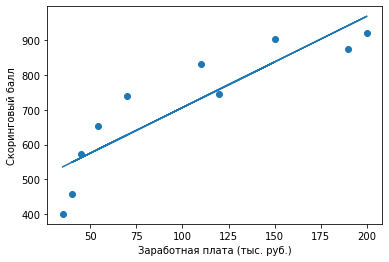

In [28]:
plt.scatter(X, y)
plt.plot(X, y_pred)
plt.xlabel('Заработная плата (тыс. руб.)')
plt.ylabel('Скоринговый балл')
plt.show()

Матричный метод без intercept

In [29]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110], dtype=np.float64)
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832], dtype=np.float64)
n = 10

In [34]:
X = X.reshape((n, 1))
y = y.reshape((n, 1))

In [35]:
B = np.dot(np.linalg.inv(np.dot(X.T,X)), X.T @ y)
B

array([[5.88982042]])

2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [36]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110], dtype=np.float64)
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832], dtype=np.float64)
n = 10

In [37]:
def mse_ (B1, y = y, X = X, n = n):
    return np.sum((B1 * X - y)**2 / n)

In [43]:
B1 = 0.1

In [44]:
alpha = 1e-6

In [45]:
for i in range (10000):
    B1 -= alpha*(2/n)*np.sum((B1*X-y)*X)
    if i % 5000 == 0:
        print('Iteration: {i}, B1={B1}, mse={mse}'.format(i=i, B1=B1, mse=mse_(B1)))

Iteration: 0, B1=0.21090574, mse=500813.19956255105
Iteration: 5000, B1=5.889820420132673, mse=56516.85841571942


*3. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [97]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110], dtype=np.float64)
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832], dtype=np.float64)
n = 10

In [98]:
def mse_intercept (B0, B1, y = y, X = X, n = n):
    return np.sum((B0 + B1 * X - y)**2 / n)

In [99]:
B0 = 0.1

In [100]:
B1 = 0.1

In [101]:
alpha = 5e-5

In [102]:
for i in range (1000000):
    y_pred = B0 + B1 * X
    B0 -= alpha*(2/n)*np.sum((y_pred-y))
    B1 -= alpha*(2/n)*np.sum((y_pred-y)*X)
    if i % 100000 == 0:
        print('Iteration: {i}, B0={B0} B1={B1}, mse={mse}'.format(i=i, B0=B0, B1=B1, mse=mse_(B1)))

Iteration: 0, B0=0.169966 B1=8.07539, mse=122323.7418595209
Iteration: 100000, B0=409.03758503899854 B1=2.8791831426087984, mse=181387.0903662731
Iteration: 200000, B0=441.39641524523927 B1=2.641007845630212, mse=201925.88388073075
Iteration: 300000, B0=443.9572751113981 B1=2.6221587847940984, mse=203618.05565202236
Iteration: 400000, B0=444.1599401401525 B1=2.6206670805791092, mse=203752.3912021712
Iteration: 500000, B0=444.1759789380671 B1=2.6205490279352976, mse=203763.02506111647
Iteration: 600000, B0=444.177248239628 B1=2.6205396853146192, mse=203763.86663520552
Iteration: 700000, B0=444.1773486914554 B1=2.620538945944757, mse=203763.9332370188
Iteration: 800000, B0=444.17735664115577 B1=2.6205388874314473, mse=203763.938507849
Iteration: 900000, B0=444.1773572702843 B1=2.620538882800784, mse=203763.9389249753
